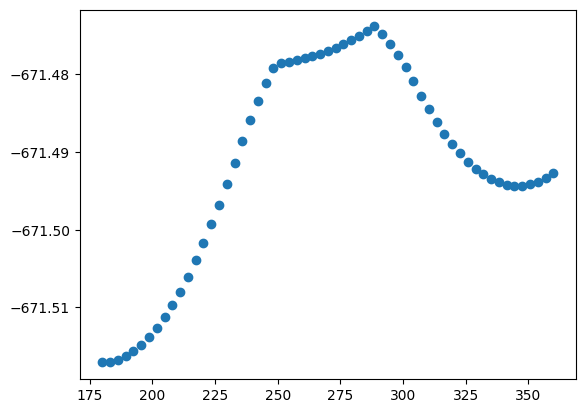

In [1]:

#import tkinter
#import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
import numpy as np
#from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

phi_data, E_data = np.genfromtxt("energy_ges.txt", delimiter=" ").T

plt.scatter(phi_data, E_data)
plt.show()

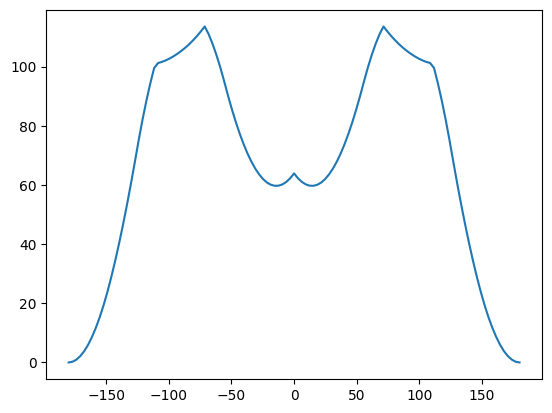

In [2]:
phi_renormalized = phi_data - phi_data[0]
phi_ges = np.append(-phi_renormalized[::-1], phi_renormalized[1:]) # Hier kommt in meinem Code eine leichte veränderung der Werte rein.... irgendwie komisch...

# phi_ges = []
# for i in range(len(phi_data)-1):
# 	phi_ges.append(phi_data[i] - phi_data[len(phi_data)-1])
# for i in range(0, len(phi_data)):
# 	phi_ges.append(phi_data[i] - phi_data[0])

E_normal_in_kJ = (E_data - E_data.min()) *2625.5
E_ges = np.append(E_normal_in_kJ, E_normal_in_kJ[-2::-1])

plt.plot(phi_ges, E_ges)
plt.show()

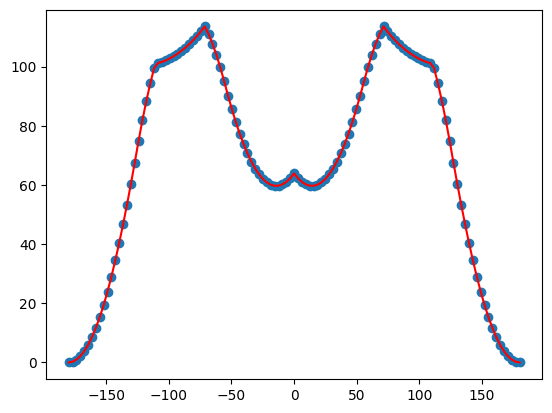

In [3]:
cs = CubicSpline(phi_ges, E_ges, bc_type='periodic')

plt.plot(phi_ges, cs(phi_ges), 'r')
plt.scatter(phi_ges, E_ges)
plt.show()

In [8]:
y = CubicSpline.__call__(cs, x = phi_ges, nu=1)

y_minus = y[::-1]

# plt.plot(phi_ges, y)
# plt.plot(phi_ges, y_minus)
# plt.show()


np.savetxt("table_d0TEST.xvg", np.column_stack((phi_ges, E_ges, y_minus)), fmt="%12.8f\t %12.8f\t %12.8f")
